**ECMM443 – Introduction to Data Science**

**Coursework title : Investigating Heart Rate Variability**

**TASK3**

In a code notebook HRV_analysis.ipynb write code to load and process the data in the provided dataset creating file fantasia.csv storing the results.

Add code that loads fantasia.csv so that the loaded data is in a dataframe named hrv_df. Add code to merges the information on age and gender of the records that can be found in fantasia_individuals.csv to the hrv_df dataframe.

Display the hrv_df dataframe in full in your notebook. 

Importing the required python libraries for the hrv metrics analysis!!

In [35]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
%matplotlib inline

Installing laTex package for the text formatting in the plots

In [36]:
pip install latex

Note: you may need to restart the kernel to use updated packages.


Setting the directory paths and initializing the hrv output variables

In [37]:
current_dir = os.path.dirname(os.path.realpath("HRV_analysis.ipynb"))
dataset_dir = os.path.join(current_dir,"investigating_hrv_dataset")

Creating the function calculate_HRV_metrics() which takes a string(file name) as an argument and processes the annotated ECG data of healthy people , calculating the HRV metrics 

In [38]:
hrv_indiv_dtl={}
def calculate_HRV_metrics(file_in:str) -> dict:
    """
    This method calculates the Heart Rate Variability metrics based on the provided annotated ECG records of
    people of differnt age groups

    Arguments:
    ----------
    file_in : str
        A string containing the name of the csv file that contains the ECG data of a person.

    Returns:
    --------
    results : dictionary
        returns a dictionary containing the calculated hrv metrics for the provided input ECG data 
        of a person. Below are the details of the dictionary values:

        - "filename" : 
            the variable stores the name of the file for which HRV metrics is calculated.

        - "n" : 
            Total Number of N-N beat intervals for the given person.

        - "mean_nn" : 
            the mean duration of all N-N intervals in the recording.

        - "mean_bpm" : 
            the mean number of beats per minute calculated using the duration of all N-N intervals 
            in the recording.

        - "sdnn" : 
            the standard deviation of the set of all N-N intervals.

        - "rmssd" : 
            the square root of the mean squared value of the beat-to-beat difference for all sequential 
            N-type beats in the recording.

        - "pnn20" :
            the proportion of beat-to-beat interval differences, where the absolute difference is greater than 20ms 
            for all sequential N-type beats in the recording.

        - "pnn50" :
            the proportion of beat-to-beat interval differences, where the absolute difference is greater than 50ms 
            for all sequential N-type beats in the recording.
    """
    
    try:
        print("-------------------------------------------------")
        # Initializing the file dictionary variable
        results = {}

        # Concatenating the Dataset directory with the file name to access the csv file
        file_name = os.path.join(dataset_dir,file_in)

        # Checking whether the given file is a valid file inside the directory
        if os.path.isfile(file_name):
            print(f"Calculation of HRV metrics for {file_in} started..")
            # Reading the data from the given csv file as a dataframe "hrv_data"
            hrv_data = pd.read_csv(file_name, delimiter=',')

            # Making a copy of dataframe locally
            hrv_df = hrv_data.copy()

            # Storing the time of next beat in the dataframe as column 'time_next'
            hrv_df['time_next'] = hrv_df['time'].shift(-1)

            # Storing the type of next beat in the dataframe as column 'type_next'
            hrv_df['type_next'] = hrv_df['type'].shift(-1)

            # Storing the interval between the current and next beat using time and time_next columns
            hrv_df['rr'] = hrv_df['time_next']- hrv_df['time']

            # combining the type and type_next columns as a new column 'rr_type'
            hrv_df['rr_type'] = hrv_df['type']+hrv_df['type_next']

            # Storing the period of the next rr interval as a new column 'rr_next'
            hrv_df['rr_next'] = hrv_df['rr'].shift(-1)

            # Storing the difference between the current interval and the next interval
            hrv_df['diff'] = hrv_df['rr']-hrv_df['rr_next']

            # Storing the squared value of the diff column
            hrv_df['diff_squared'] = hrv_df['diff']**2

            # Storing the type of the next interval in the new column "rr_next_type"
            hrv_df['rr_next_type'] =hrv_df['rr_type'].shift(-1)

            # Filtering only the NN type intervals from the dataframe "hrv_data"
            hrv_df = hrv_df[hrv_df['rr_type']=='NN']

            # Getting the total number of intervals in variable 'n'
            n = int(hrv_df.shape[0])

            # Storing the result dataframe in a dictionary hrv_indiv_dtl
            hrv_indiv_dtl[file_in]=hrv_df

            # Calculating the HRV metrics
            mean_nn = int(np.round(hrv_df['rr'].mean(),decimals=0))
            mean_bpm = np.round((1000/mean_nn)*60,decimals=1)
            sdnn = np.round(np.std(hrv_df['rr'], ddof=1),decimals=1)

            # filtering out the sequential NN intervals for calculating the metrics
            hrv_rr_df = hrv_df[hrv_df['rr_next_type']=='NN']
            rmssd = np.round(np.sqrt(np.mean(hrv_rr_df['diff_squared'].dropna())),decimals=1)
            pnn50 = np.round(100 * np.sum(np.abs(hrv_rr_df['diff']) > 50) / n,decimals=1)
            pnn20 = np.round(100 * np.sum(np.abs(hrv_rr_df['diff']) > 20) / n,decimals=1)
        
            # Checking whether total number of NN type intervals are more than 500
            if n >= 500:
                # Storing the HRV metrics in the results dictionary
                results['filename'] = file_in
                results['n'] = n
                results['mean_nn'] = mean_nn
                results['mean_bpm'] = mean_bpm
                results['sdnn'] = sdnn
                results['rmssd'] = rmssd
                results['pnn20'] = pnn20
                results['pnn50'] = pnn50
            else:

                # if the NN intervals are less than 500, the results dictionary is populated with None values
                results['filename'] = file_in
                results['n'] = n
                results['mean_nn'] = None
                results['mean_bpm'] = None
                results['sdnn'] = None
                results['rmssd'] = None
                results['pnn20'] = None
                results['pnn50'] = None

            # Returning the calculated HRV metrics in the results dictionary object.
            print("-------------------------------------------------")
            for k,v in results.items():
                print(f"{k} : {v} ")
            print("-------------------------------------------------")
            print(f"Calculation of HRV metrics for {file_in} completed!")

            return results
        else:
            print(f"File '{file_in}' cannot be accessed. Please verify! ")
    except Exception as e:
        print(f"Exception : {e}")


Creating a function process_HRV_files() which takes the given list of files to fetch the annotated ECG data of people across different age groups.

In [39]:
hrv_results = []
def process_HRV_files(file_list_in:list[str], file_out:str) -> None:
    """
    This method processes the given list of files to fetch the annotated ECG data of people across 
    different age groups.

    Arguments:
    ----------
    file_list_in : List[str]
        A list of strings containing the file names of the annotated ECG data of different people.

    file_out : str
        A string containing the name of the output csv file which needs to be created with the calculated
        hrv metrics.

    Returns : 
    ---------
    None 

    Additional Information:
    -----------------------
    This method fetches the csv data files from the dataset directory and calculate the HRV metrics for the given data.
    Once the data has been calculated , the output results are added to the csv file and saved the same location.
    
    """
    try:
        print("-------------------------------------------------")
        print("Processing of the input data csv files started..")

        # Iterating over the file in the provided list of files in the directory
        for file in file_list_in:

            # Checking whether the file ends with '.csv' format
            if file.endswith(".csv"):

                # Calling the 'calculate_HRV_metrics' method with the file name as input
                result_dict=calculate_HRV_metrics(file_in=file)
                #print(f"Results for file {file} : {result_dict}")

                # Appending the results dictionary to the final list
                hrv_results.append(result_dict)
            else:
                print("-------------------------------------------------")
                print(f"File format '{file}' is not csv. Please verify!!")
                print("-------------------------------------------------")
        #print(f"Total HRV results : {hrv_results}")
        
        # Converting the output list to the dataframe
        df = pd.DataFrame(hrv_results)
        print("Processing of the input data csv files completed!!")
        print("-------------------------------------------------")
        print(df)
        print("-------------------------------------------------")
        # Adding the output file name with the current directory
        file_out_name = os.path.join(current_dir,file_out)

        # Converting the dataframe into output csv file
        df.to_csv(file_out_name, index=False)

        if os.path.isfile(file_out_name):
            print(f"Output csv file {file_out} is generated successfully")
        else:
            print(f"Output csv file {file_out} is not generated. Please verify")
        print("-------------------------------------------------")

    except Exception as e:
        print(f"Exception : {e}")


Calling the functions created to process the given input csv files of people of different age groups.

In [40]:
print("-------------------------------------------------")
print(f"Current Directory : {current_dir}")
print(f"Dataset Directory : {dataset_dir}")

# Checking whether the given directory is exists and valid. if not , raise Exception
try:
    if os.path.exists(dataset_dir) and os.listdir(dataset_dir):

        # Creating a list of file names 
        file_list_in = os.listdir(dataset_dir)
        
        #print(file_list_in)

        # Invoking the process_HRV_files function with file list and output file name
        process_HRV_files(file_list_in=file_list_in, file_out='fantasia.csv')
    else:
        raise Exception("Directory/Folder doesnt exist. Please check the path!!")
except Exception as e:
    print(f"Exception : {e}")

-------------------------------------------------
Current Directory : D:\Data Science\Intro to Data Science\Coursework\Coursework - 2024-20241022
Dataset Directory : D:\Data Science\Intro to Data Science\Coursework\Coursework - 2024-20241022\investigating_hrv_dataset
-------------------------------------------------
Processing of the input data csv files started..
-------------------------------------------------
Calculation of HRV metrics for o01.csv started..
-------------------------------------------------
filename : o01.csv 
n : 7168 
mean_nn : 1011 
mean_bpm : 59.3 
sdnn : 48.0 
rmssd : 15.5 
pnn20 : 13.0 
pnn50 : 0.6 
-------------------------------------------------
Calculation of HRV metrics for o01.csv completed!
-------------------------------------------------
Calculation of HRV metrics for o02.csv started..
-------------------------------------------------
filename : o02.csv 
n : 6796 
mean_nn : 1062 
mean_bpm : 56.5 
sdnn : 33.7 
rmssd : 15.0 
pnn20 : 12.6 
pnn50 : 0.4 
-

Reading the csv file "fantasia.csv" into a dataframe named "hrv_df"

In [41]:
hrv_df = pd.read_csv('fantasia.csv')

Merging the information on age and gender of the records that can be found in fantasia_individuals.csv to the hrv_df dataframe.

In [42]:
fantasia_indiv_df = pd.read_csv('fantasia_individuals.csv')
fantasia_indiv_df.rename(columns={"file":"filename"}, inplace=True)
hrv_df = pd.merge(hrv_df,fantasia_indiv_df, on='filename')

Displaying the hrv_df dataframe in full after the merge

In [43]:
hrv_df

,filename,n,mean_nn,mean_bpm,sdnn,rmssd,pnn20,pnn50,age,group,sex
0,o01.csv,7168,1011,59.3,48.0,15.5,13.0,0.6,77,old,F
1,o02.csv,6796,1062,56.5,33.7,15.0,12.6,0.4,73,old,F
2,o03.csv,7203,1004,59.8,47.9,23.7,26.9,3.1,73,old,M
3,o04.csv,6213,1163,51.6,116.3,118.1,40.3,12.5,81,old,M
4,o05.csv,5725,1088,55.1,43.2,11.3,6.0,0.1,76,old,M
5,o06.csv,6216,1168,51.4,23.9,19.9,24.5,0.7,74,old,F
6,o07.csv,7035,1014,59.2,50.7,27.0,33.0,4.5,68,old,M
7,o08.csv,8462,850,70.6,43.8,24.2,32.6,3.4,73,old,F
8,o09.csv,4731,1483,40.5,94.4,66.5,66.7,34.4,71,old,M
9,o10.csv,8238,880,68.2,57.3,20.9,27.7,2.0,71,old,F


**TASK4 - POINCARE PLOTS FOR VISUALISATION**

Poincare plots visualise a heartbeat record by plotting the duration of each heartbeat
interval (x-axis) against the duration of the subsequent heartbeat (y-axis) as a scatter plot
e.g. if a beat of 800ms duration is followed by a beat of 870ms duration, then it would be
plotted as a point at coordinates (800, 870).

In your notebook HRV_analysis.ipynb write code to make a multiplot figure (four rows and five columns) multiplot figure showing the Poincare plots for the records, arranging the plot order and formatting so that any differences between the groupings can be compared.

Ensure that your figure has suitable labels, and that the axes range for all plots is matched
to allow easy comparison.

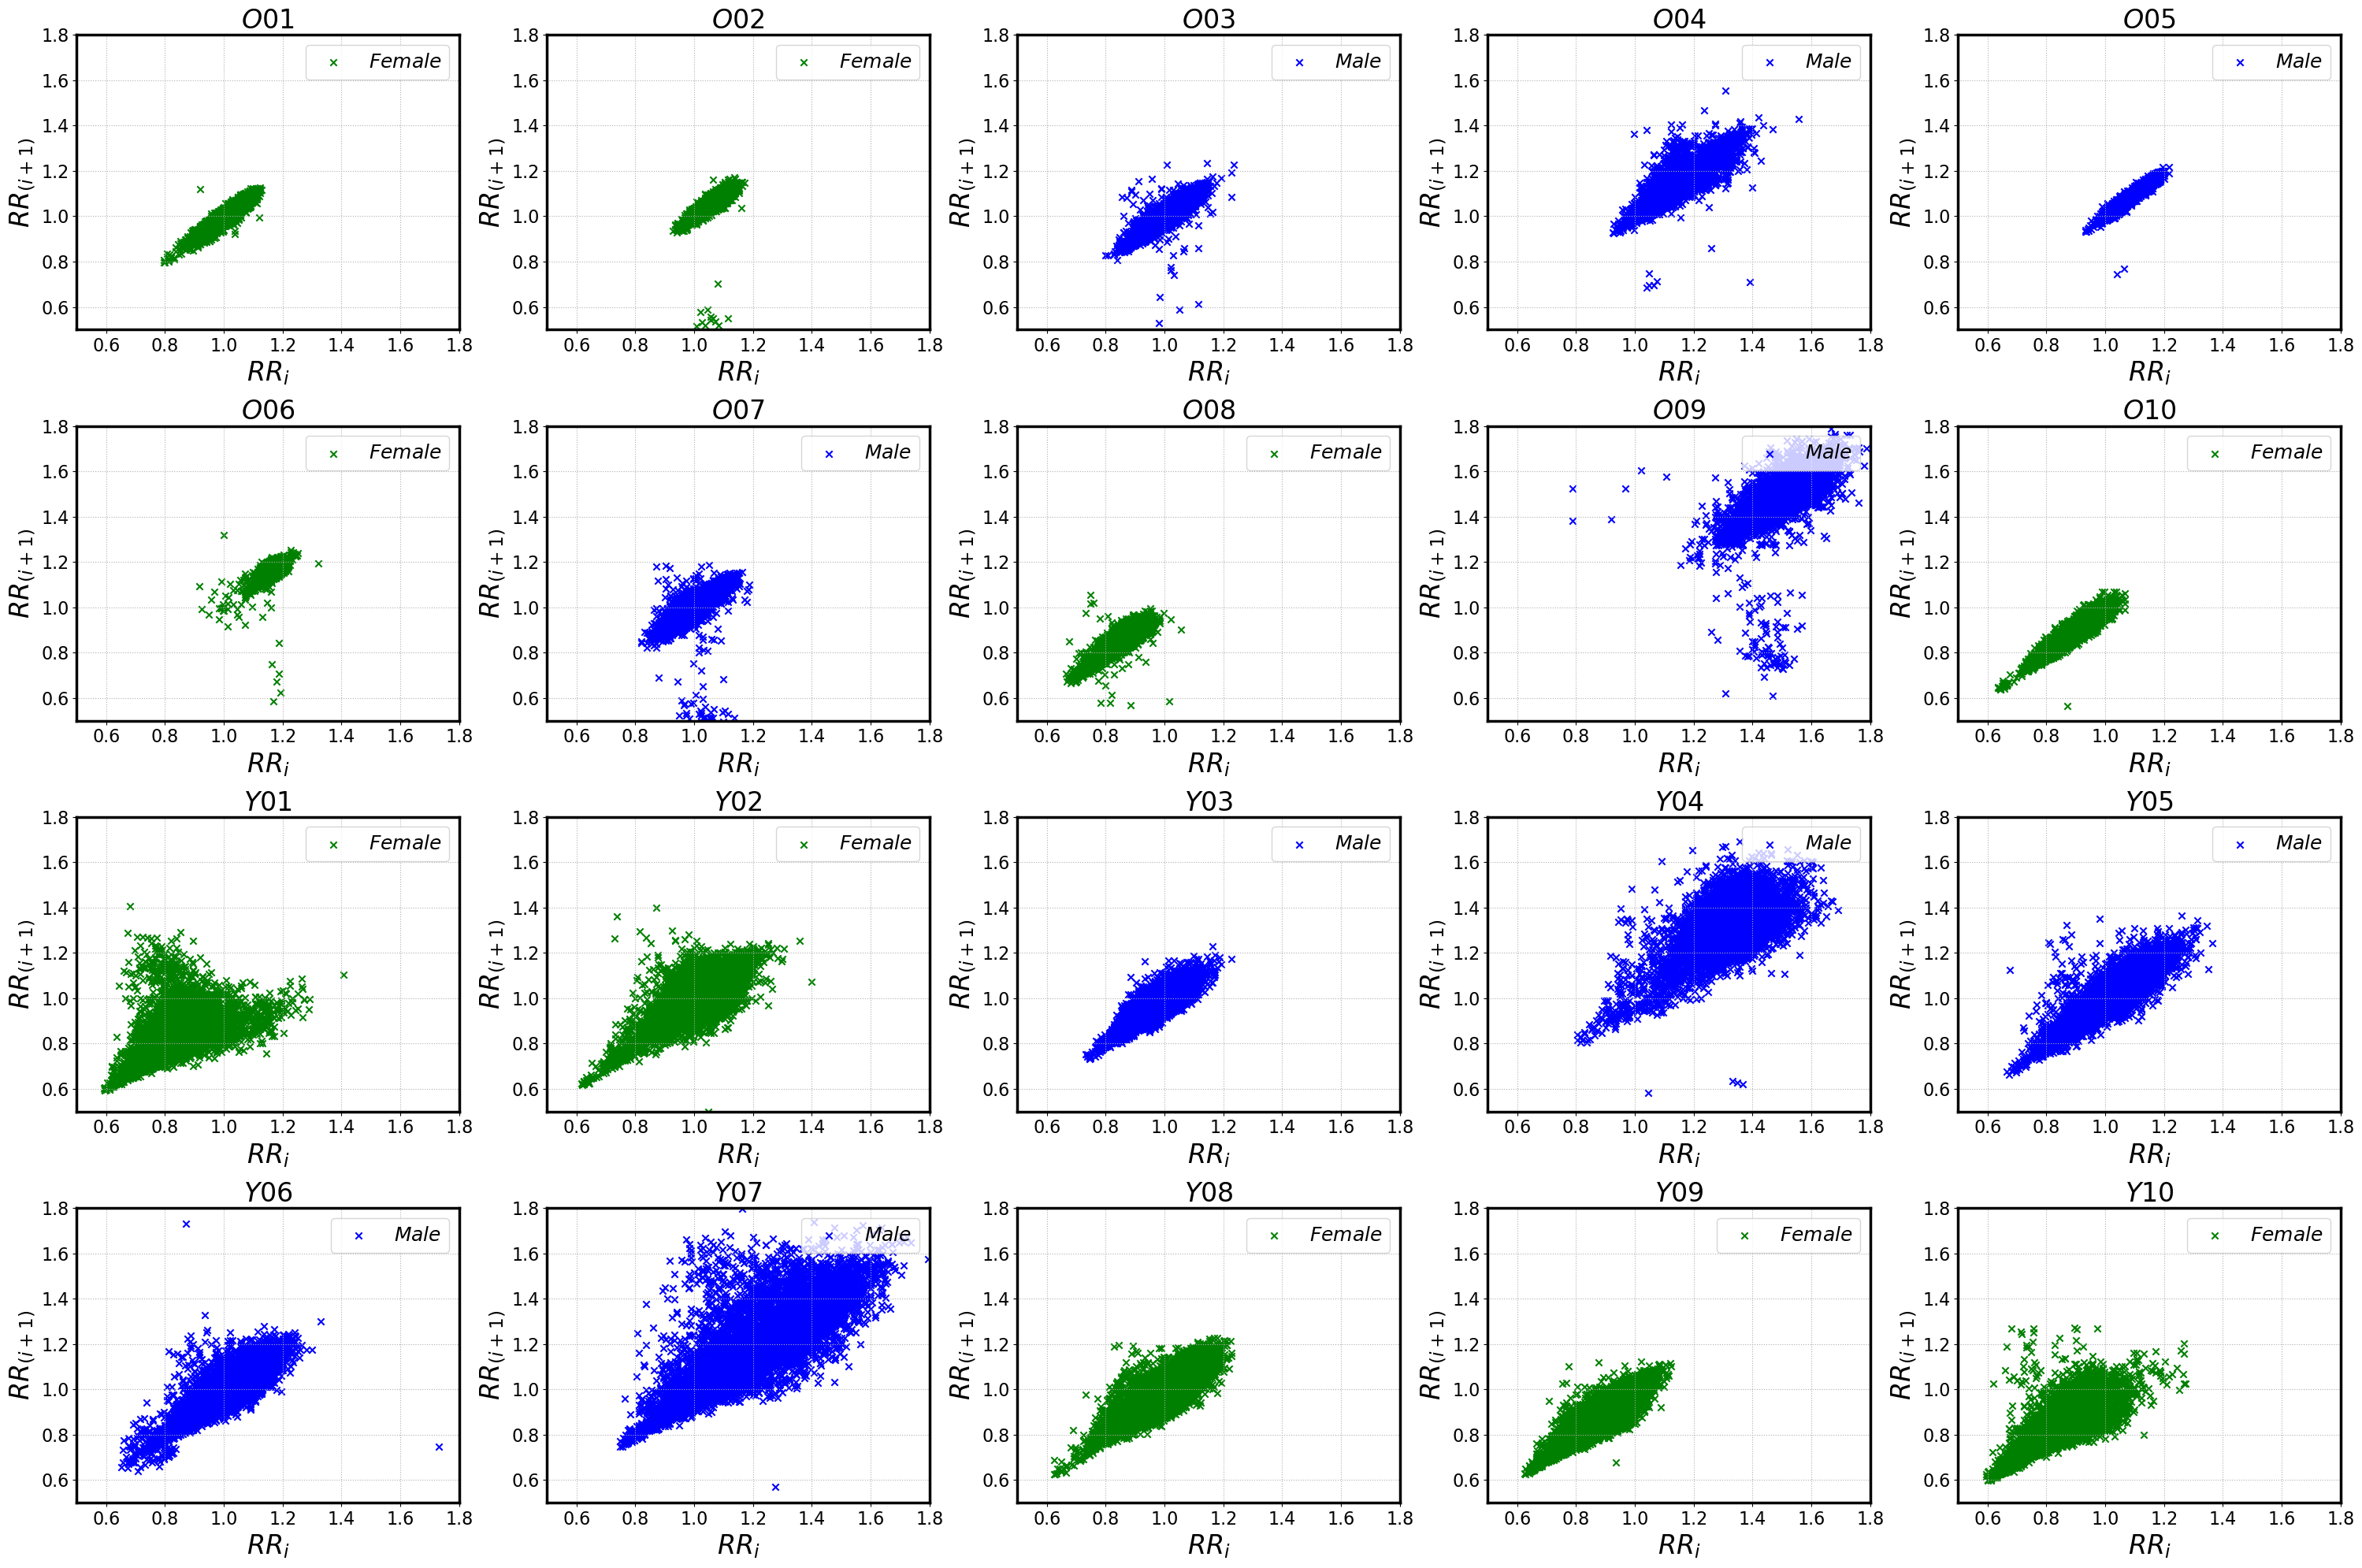

In [44]:
# Creating the axes tuples for the multiplot figure
axes_list = []
for i in range(0,4):
    for j in range(0,5):
        axes_tuple = (i,j)
        axes_list.append(axes_tuple)

# Updating the plot parameters
plt.rcParams.update({'figure.figsize':(30,20),
"axes.edgecolor":"black",'axes.linewidth':2.5,'savefig.facecolor':"0.8",
'xtick.labelsize':16,'ytick.labelsize':16,'text.usetex':False,'figure.edgecolor':"black"})

# Creating a multiplot figure with 4 rows and 5 columns
fig, axes = plt.subplots(nrows=4,ncols=5)

# Getting the keys from the HRV individual details dictionary
hrv_keys = list(hrv_indiv_dtl.keys())

# Getting the values from the HRV individual details dictionary
hrv_values = list(hrv_indiv_dtl.values())

# Setting the counter to 0
cnt = 0

# Looping for the range of length of HRV individual detail dictionary
while cnt < len(hrv_indiv_dtl):
    i, j = axes_list[cnt]
    file = hrv_keys[cnt]
    name = file.split('.')

    # Getting the sex details (Male/Female) from the fantasia_indiv_df dataframe
    sex = fantasia_indiv_df[fantasia_indiv_df['filename']==file]['sex'].squeeze()
    df = hrv_values[cnt]
    if sex == 'M':
        legend_name2 = 'Male'
    elif sex == 'F':
        legend_name2 = 'Female'
    #legend_name = legend_name1 + ' ' + legend_name2

    # Plot the scatter plot based on the sex. if Male , use blue color and if Female, use green color
    if sex=='M':
        axes[i][j].scatter(x=df['rr']/1000,y=df['rr_next']/1000,color='b',marker='x',label=f"${legend_name2}$")
    else:
        axes[i][j].scatter(x=df['rr']/1000,y=df['rr_next']/1000,color='g',marker='x',label=f"${legend_name2}$")
    
    # Drawing a diagonal line to interpret the points
    # axes[i][j].axline((0,0), slope=1, color='red')

    # Setting the title of each plot
    axes[i][j].set_title(f"${str(name[0]).upper()}$",fontsize=24)

    # Setting the x and y limits of each plot
    axes[i][j].set_xlim(0.5,1.8)
    axes[i][j].set_ylim(0.5,1.8)

    # Setting the x and y labels of each plot
    axes[i][j].set_xlabel(r'$RR_i$',fontsize=24)
    axes[i][j].set_ylabel(r'$RR_{(i+1)}$',fontsize=24)

    # Enabling the grid
    axes[i][j].grid(linestyle='dotted')

    # Enabling the legend
    axes[i][j].legend(loc='upper right',fontsize=18)

    #Incrementing the counter
    cnt+=1

#plt.figure(facecolor='lightskyblue')
plt.tight_layout()

# Saving the plot as 'poincare_plot.png' in the same directory
plt.savefig(r'images\\poincare_plot.png', dpi=300)

Reloading the saved 'poincare_plot.png' figure from the images folder in the current directory!!

In [45]:
from IPython.display import Image
img = os.path.join(current_dir, r'images\\poincare_plot.png')
Image(filename=img)

**Task 5**

We want to reproduce the analysis that considers the statistical evidence that heart rate (as indicated by mean bpm) and heart rate variability (as indicated by metric RMSSD) differ by age group.

In your notebook write code that applies a t-test to assess the statistical difference in these variables between the two groups.

Add a code section that creates figures to illustrate this analysis, along with a short paragraph setting out the analysis results.

**Answer:** 
Applying the t-test to assess the statistical difference in these variables between the two groups.

**Null Hypothesis :**
The heart rate and heart rate variability doesnt differs by age group.

**Alternate Hypothesis :**
The heart rate and heart rate variability differs by age group.

**Significance level:** 
0.05 or 5%

In [46]:
# Seperating the hrv data for young and old people
young_group = hrv_df[hrv_df['group']=='young']
old_group = hrv_df[hrv_df['group']=='old']

# Getting the bpm data for young and old people
young_group_bpm = young_group[['mean_bpm']]
old_group_bpm = old_group[['mean_bpm']]

# Getting the sdnn data for young and old people
young_group_sdnn = young_group[['sdnn']]
old_group_sdnn = old_group[['sdnn']]

# Getting the rmssd data for young and old people
young_group_rmssd = young_group[['rmssd']]
old_group_rmssd = old_group[['rmssd']]

In [47]:
# Calculating the mean and variance for bpm,sdnn, rmssd data
young_mean_bpm = np.round(np.mean(young_group_bpm),decimals=4)
old_mean_bpm = np.round(np.mean(old_group_bpm),decimals=4)
young_sd_bpm = np.round(np.std(young_group_bpm,ddof=1,axis=0),decimals=4)
old_sd_bpm = np.round(np.std(old_group_bpm,ddof=1,axis=0),decimals=4)

young_mean_sdnn = np.round(np.mean(young_group_sdnn),decimals=4)
old_mean_sdnn = np.round(np.mean(old_group_sdnn),decimals=4)
young_sd_sdnn = np.round(np.std(young_group_sdnn,ddof=1,axis=0),decimals=4)
old_sd_sdnn = np.round(np.std(old_group_sdnn,ddof=1,axis=0),decimals=4)

young_mean_rmssd = np.round(np.mean(young_group_rmssd),decimals=4)
old_mean_rmssd = np.round(np.mean(old_group_rmssd),decimals=4)
young_sd_rmssd = np.round(np.std(young_group_rmssd,ddof=1,axis=0),decimals=4)
old_sd_rmssd = np.round(np.std(old_group_rmssd,ddof=1,axis=0),decimals=4)

In [48]:
# Calculating the t-stat and p-value for bpm and rmssd data
from scipy.stats import t
dof =  19
t_stat_bpm = np.round((young_mean_bpm-old_mean_bpm)/(np.sqrt((young_sd_bpm**2)/10 + (old_sd_bpm**2)/10)),decimals=8)
p_val_bpm = np.round(2*(1 - t.cdf(abs(t_stat_bpm.iloc[0]), dof)),decimals=8)
t_stat_sdnn = np.round((young_mean_sdnn-old_mean_sdnn)/(np.sqrt((young_sd_sdnn**2)/10 + (old_sd_sdnn**2)/10)),decimals=8)
p_val_sdnn = np.round(2*(1 - t.cdf(abs(t_stat_sdnn.iloc[0]), dof)),decimals=8)
t_stat_rmssd = np.round((young_mean_rmssd-old_mean_rmssd)/(np.sqrt((young_sd_rmssd**2)/10 + (old_sd_rmssd**2)/10)),decimals=8)
p_val_rmssd = np.round(2*(1 - t.cdf(abs(t_stat_rmssd.iloc[0]), dof)),decimals=8)

In [49]:
print(f"t-stat value for mean bpm is {t_stat_bpm.iloc[0]} with p-value {p_val_bpm}")
print(f"t-stat value for sdnn is {t_stat_sdnn.iloc[0]} with p-value {p_val_sdnn}")
print(f"t-stat value for rmssd is {t_stat_rmssd.iloc[0]} with p-value {p_val_rmssd}")

t-stat value for mean bpm is 0.80492509 with p-value 0.43082086
t-stat value for sdnn is 3.39851405 with p-value 0.00301458
t-stat value for rmssd is 2.49876409 with p-value 0.02179712


Comparing the calculated results by hand with the scipy.stats.ttest_ind package results

In [50]:
from scipy.stats import ttest_ind
t_stat_bpm1,p_val_bpm1  = ttest_ind(young_group_bpm, old_group_bpm, equal_var=False)
t_stat_sdnn1 , p_val_sdnn1 = ttest_ind(young_group_sdnn,old_group_sdnn,equal_var=False)
t_stat_rmssd1, p_val_rmssd1 = ttest_ind(young_group_rmssd, old_group_rmssd, equal_var=False)
print(f"t-stat value for mean bpm is {t_stat_bpm1} with p-value {p_val_bpm1}")
print(f"t-stat value for sdnn is {t_stat_sdnn1} with p-value {p_val_sdnn1}")
print(f"t-stat value for rmssd is {t_stat_rmssd1} with p-value {p_val_rmssd1}")

t-stat value for mean bpm is [0.80492163] with p-value [0.43137041]
t-stat value for sdnn is [3.39851446] with p-value [0.00344125]
t-stat value for rmssd is [2.49876408] with p-value [0.02239811]


***Creating box plot and violin plot for the t-test statistical analysis***

**Mean Heart Beat(mean_bpm):**

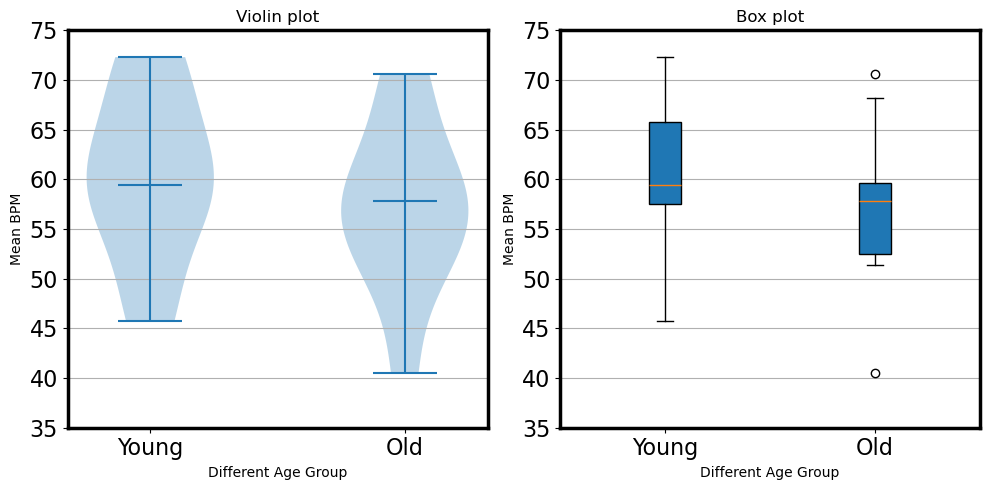

In [51]:
data = [young_group_bpm['mean_bpm'],old_group_bpm['mean_bpm']]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].violinplot(data,showmeans=False, showmedians=True)
axs[0].set_title('Violin plot')
axs[1].boxplot(data,patch_artist = True)
axs[1].set_title('Box plot')
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_ylabel('Mean BPM')
    ax.set_ylim(35,75)
    ax.set_xlabel('Different Age Group')
    ax.set_xticks([y+1 for y in range(len(data))],labels=['Young','Old'])
plt.tight_layout()
plt.savefig(f'images\\box_violin_plt_mean_bpm.png', dpi=300)

**Standard deviation of NN intervals(sdnn column):**

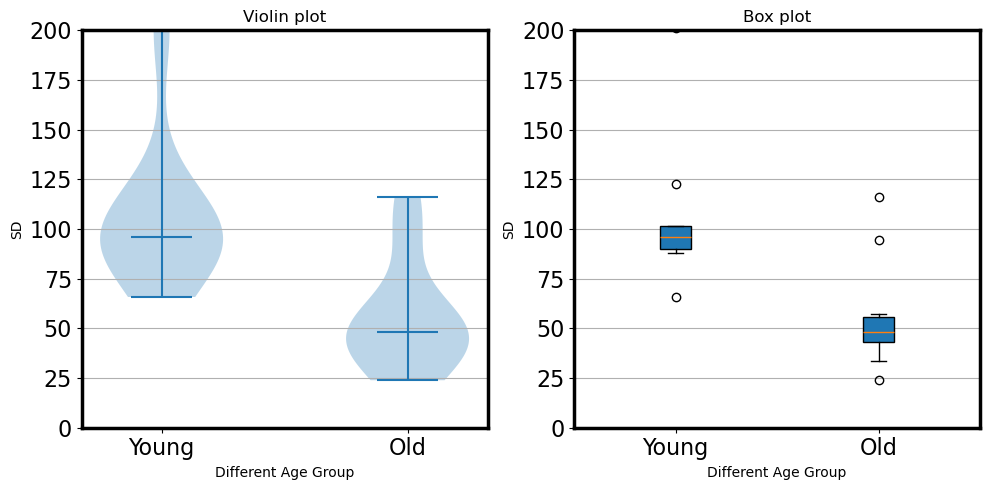

In [52]:
sdnn_data = [young_group_sdnn['sdnn'],old_group_sdnn['sdnn']]
fig, ax_sd = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax_sd[0].violinplot(sdnn_data,showmeans=False, showmedians=True)
ax_sd[0].set_title('Violin plot')
ax_sd[1].boxplot(sdnn_data,patch_artist = True)
ax_sd[1].set_title('Box plot')
for ax in ax_sd:
    ax.yaxis.grid(True)
    ax.set_ylabel('SD')
    ax.set_ylim(0,200)
    ax.set_xlabel('Different Age Group')
    ax.set_xticks([y+1 for y in range(len(sdnn_data))],labels=['Young','Old'])
plt.tight_layout()
plt.savefig(r'images\\box_violin_plt_sdnn.png', dpi=300)

**Root Mean Square of Standard Deviation(rmssd column):**

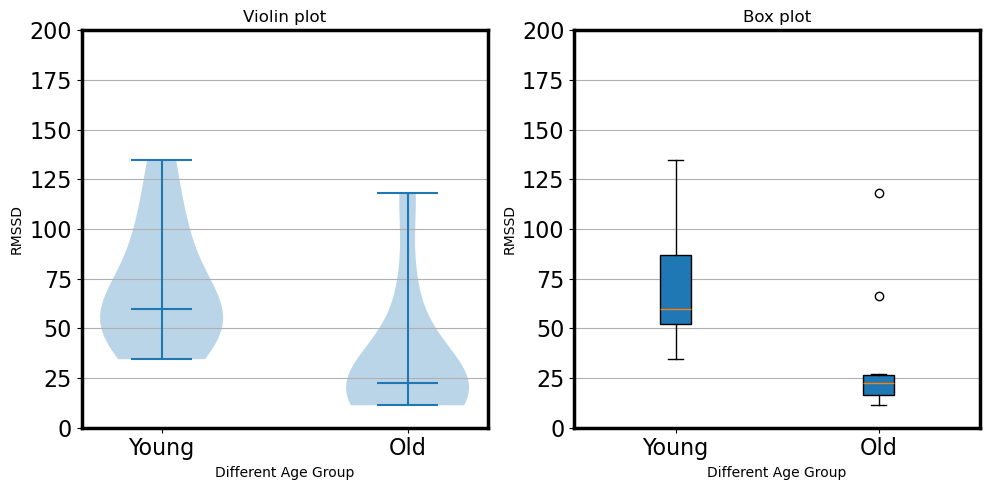

In [53]:
rmssd_data = [young_group_rmssd['rmssd'],old_group_rmssd['rmssd']]
fig, axess = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axess[0].violinplot(rmssd_data,showmeans=False, showmedians=True)
axess[0].set_title('Violin plot')
axess[1].boxplot(rmssd_data,patch_artist = True)
axess[1].set_title('Box plot')
for ax in axess:
    ax.yaxis.grid(True)
    ax.set_ylabel('RMSSD')
    ax.set_ylim(0,200)
    ax.set_xlabel('Different Age Group')
    ax.set_xticks([y+1 for y in range(len(rmssd_data))],labels=['Young','Old'])
plt.tight_layout()
plt.savefig(r'images\\box_violin_plt_rmssd.png', dpi=300)

***T-test Results provided in the original Fantasia Paper:***

The mean heart rates of the young and elderly subjects were similar. Although the standard deviation
of heart rate was significantly greater in the young subjects compared with the old (P < 0.0001; Table l),
this measure of variance does not provide information about the dynamic properties of the time series.

<img src="images\\t-test_fantasia.png" style="height:200px">

In the original fantasia paper, to prove the heart rate variability statistically , the standard deviation of the heart rate data (sdnn column) is used which is not a good metric for comparing heart rate variability generally because the measured SDNN is dependent on the length of the recording.

The results of the original paper is reproduced in this coursework where the p-value of heart rate is **0.43082086** and heart rate variability (Standard deviation ) is **0.00344125**.

***T-test results done as part of the coursework:***

In our coursework, instead of sdnn data , we have used to the Root mean square data of Standart Deviation in heart rate to prove statistically for determining short term variability in heart rate.

**Mean Heart Rate:**
- Since the calculated p-value for the Mean heart rate **0.43082086** is greater than the significance level **alpha = 0.05** , we **failed to reject the null hypothesis and it is not statistically significant**. Hence the mean heart rates of the young and elderly subjects are similar. 

**Root Mean Square of SD of Heart Rate:**
- Since the calculated p-value for the Root mean square of Standard Deviation of Heart Rate **0.02239811** is less than then significance level **alpha = 0.05**, we **reject the null hypothesis and it is statistically significant**.Hence the heart rate variability differs between different age and gender groups. 


**Task 6**


**6a.** Write a short discussion that discusses the key observations that can be made from the
Poincare plots, in terms of how they relate to the statistical analysis performed.

Reloading the created Poincare Plot with the Diagonal line for making key observations

<img src="images\\poincare_plot_diagonal.png" style="height:500px">

**In the generated Poincare plots above, the mean heart rate doesnt differ much between young and old people. Also we could see that in the young people, the heart rate pattern almost follows a comet pattern where the points are away from the diagonal. This shows that in the young people, heart rate variability is more.** 

**Whereas in the old people, the points lie close to the diagonal in the Poincare plots. Hence showing that the heart rate variation in old people is slower and not much compared with the young people.**

**This also proves the statistical analysis which we made earlier stating that the mean heart rate doesnt differ much by age group where heart rate variability differs by age group.**

**6b.** In this investigation we have applied the t-test to detect statistical differences. Critically
evaluate the applicability of the test and suggest what additional or alternative approaches
would be suitable

**Evaluation of applicability of t-test:**
In this investigation , we have used the t-test to detect statistical differences. Below are the valid reasons.
- t-test is used to compare the means of two groups. Here, we are comparing the mean heart rate of young and old people. Hence we used two sample t-test.
- t-test can be applied only to continuous data. Heart beat data is continous
- t-test is applicable for smaller sample size. If the sample size increases, z-test is more applicable.

**Additional or Alternate approaches to t-test:**
Since t-test is a statistical test that compares the means of two groups and also,in this investigation we compare 2 groups, the alternate approaches to t-test are :
- Wilcoxon signed-rank test
- Mann-Whitney U test

The below statistical test are not applicable for the given reasons below.
- **Paired t-test** : In this test, sample groups should be dependent to each other.
- **ANOVA** : this test is used when the sample groups are more than two.
- **ANOM** : this test is used to compare sample group mean with overall mean.



In [54]:
# Applying Mann-Whitney U test and Wilcoxon signed rank test

from scipy.stats import mannwhitneyu,wilcoxon

# Calculating the p-value for mean heart rate using Mann-Whitney U test
U1, p_mann = mannwhitneyu(young_group_bpm, old_group_bpm, method="exact")
nx, ny = len(young_group_bpm), len(old_group_bpm)
U2 = nx*ny - U1

# Calculating the p-value for mean heart rate using Wilcoxon signed rank test
w_stat, p_wilcoxon = wilcoxon(young_group_bpm, old_group_bpm, method='approx')
print(f"p-value of Mann-Whitney U test : {p_mann[0]}")
print(f"p-value of Wilcoxon signed rank test : {p_wilcoxon[0]}")

p-value of Mann-Whitney U test : 0.43587217735824557
p-value of Wilcoxon signed rank test : 0.4445867389117455


**Thus the p-value of alternate approaches (Mann-Whitney U test & Wilcoxon signed rank test) to t-test is also similar (~0.44).**

**6c.** What additional plots may be useful to view each recording before including it in the analysis. You may include an example plot/plots and explain why this would be useful.

In [55]:
# Getting the heart rate details for a young and old person
yfile_nm = os.path.join(dataset_dir,'y07.csv')
ofile_nm = os.path.join(dataset_dir,'o05.csv')
y_df = pd.read_csv(yfile_nm, delimiter=',')
o_df = pd.read_csv(ofile_nm, delimiter=',')
hrv_ydf = y_df.copy()
hrv_ydf['time_next'] = hrv_ydf['time'].shift(-1)
# Calculating the heart beat interval for young person 'rr' interval
hrv_ydf['rr'] = hrv_ydf['time_next']- hrv_ydf['time']
hrv_odf = o_df.copy()
hrv_odf['time_next'] = hrv_odf['time'].shift(-1)
# Calculating the heart beat interval for old person 'rr' interval
hrv_odf['rr'] = hrv_odf['time_next']- hrv_odf['time']

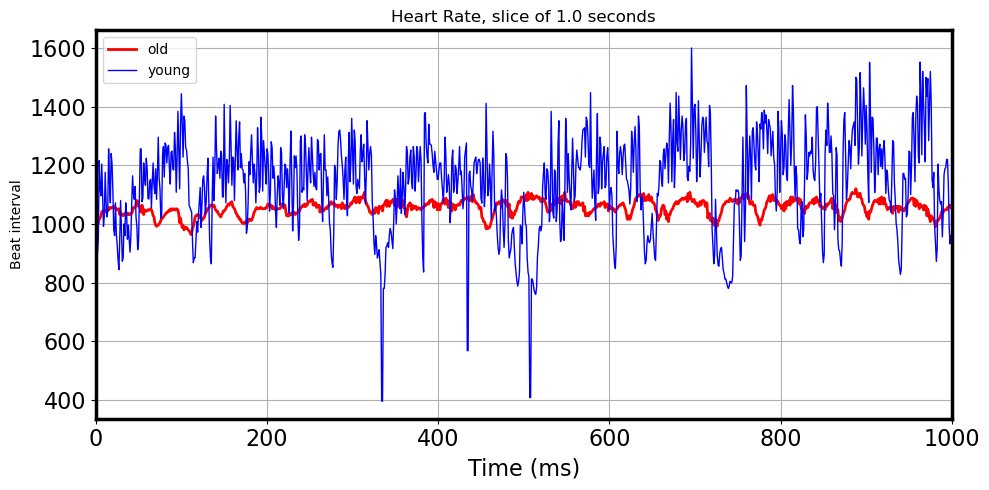

In [56]:
# PLotting a time series to view recording of one sample young and old person before using the data in the analysis
fig= plt.figure(figsize=(10, 5))
start = 0
stop = 1000
duration = (stop-start) / 1000
plt.title("Heart Rate, slice of %.1f seconds" % duration)
plt.plot(hrv_odf[start:stop].index, hrv_odf[start:stop]['rr'], color="r", linewidth=2,label='old')
plt.plot(hrv_ydf[start:stop].index, hrv_ydf[start:stop]['rr'], color="b", linewidth=1,label='young')
plt.xlabel("Time (ms)", fontsize=16)
plt.ylabel("Beat interval")
plt.xlim(0,1000)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(r'images\\heart_rate.png', dpi=200)

**Additional plots like time series can be found useful to visualise the heart rate differences between young and old people.**

**6d.** Explore the current research in this area and briefly set out the current understanding
of heart rate and heart rate variability by age and gender.

**Current Research in HRV metrics calculation:**

- Researches show that simple, inexpensive and non-intrusive abdominal and complete yoga breathing techniques can effectively and momentarily enhance HRV and oxygen saturation in adults, mature adults and the elderly.
    - **Heart Rate Variability, Blood Pressure and Peripheral Oxygen Saturation during Yoga Adham and Mahat Breathing Techniques without Retention in Adult Practitioners**
    - David Catela, Júlia Santos, Joana Oliveira, Susana Franco, Cristiana Mercê
    - published : 2024 Oct
    - https://pubmed.ncbi.nlm.nih.gov/39449478/

- Researches are being done in the occupational medicine and occupational health science field to calculate the variation in the heart rate.
    - **Guideline for the application of heart rate and heart rate variability in occupational medicine and occupational health science**
    - Stefan Sammito, Beatrice Thielmann, Andre Klussmann, Andreas Deußen, Klaus-Michael Braumann & Irina Böckelmann 
    - Journal of Occupational Medicine and Toxicology volume 19, Article number: 15 (2024) 
    - https://occup-med.biomedcentral.com/articles/10.1186/s12995-024-00414-9 

- Researches are being done in a large scale for collecting hrv data and analyzing more complex patterns of health issues with the use of wearable smart devices.
    - **Heart Rate Variability Measurement through a Smart Wearable Device: Another Breakthrough for Personal Health Monitoring?**
    - by Ke Li 1,Cristiano Cardoso 1,Angel Moctezuma-Ramirez 1ORCID,Abdelmotagaly Elgalad 1,*ORCID andEmerson Perin
    - Published: 6 December 2023
    - https://www.mdpi.com/1660-4601/20/24/7146 

- Researches are done to figure out the impact on the HRV data of a person when the duration of a particular and single activity increases.
    - **Positive affect and heart rate variability: a dynamic analysis**
    - Tony Beatton, Ho Fai Chan, Uwe Dulleck, Andrea Ristl, Markus Schaffner & Benno Torgler 
    - Published: 25 March 2024
    - https://www.nature.com/articles/s41598-024-57279-5 

**Current understanding of heart rate and heart rate variability by age and gender:**
- The heart rate and heart variability by age and gender can be monitored continuously by the use of smart devices which helps takes preventive measures ahead of time with respect to diseases related to heart.

- Heart rate can be improved across different age and gender groups by following good breathing techniques and practising yoga. Thus resulting in the changes of one's lifestyle.

- Positive impact on hrv data during exposure to the physical activities is commendable.

